># <center> <font color='red'> CMPE428 - DATA SCIENCE </font> </center>
>## <center> <font color='blue'> Assignment 3 - Exploration and Visualization of Data </font>  </center>

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Download the dataset “NHANES0910modified.csv” from https://staff.emu.edu.tr/hakanaltincay/Documents/CMPE428/.
The columns named as ClassLabel, Gender, Race, Education, FamilyHistory and HighBloodSugar are categorical and
the others are numerical.

In [104]:
df = pd.read_csv("NHANES0910modified.csv")

Display the top 10 rows of the dataset

In [105]:
print(df.head(10))

  ClassLabel  Gender  Age  Race  Education  FamilyHistory  HighBloodSugar  \
0   Negative       1   44     3        3.0              1               1   
1   Negative       2   44     1        2.0              2               1   
2   Negative       1   22     3        5.0              1               1   
3   Negative       2   35     3        4.0              1               1   
4   Negative       1   54     2        5.0              2               1   
5   Negative       1   54     4        5.0              2               1   
6   Negative       2   25     1        2.0              1               1   
7   Negative       1   80     3        4.0              1               1   
8   Negative       1   49     1        2.0              1               1   
9   Negative       2   37     2        4.0              2               1   

     BMI  WaistCircumference  SystolicBP  DiastolicBP  LDL  HDL  Triglycerides  
0  29.10               106.6         119           88  113   37        

Count and report the number of missing values in each variable

In [106]:
print(df.isnull().sum())

ClassLabel             0
Gender                 0
Age                    0
Race                   0
Education             12
FamilyHistory          0
HighBloodSugar         0
BMI                    9
WaistCircumference     0
SystolicBP             0
DiastolicBP            0
LDL                    0
HDL                    0
Triglycerides          0
dtype: int64


Impute the missing values in categorical variables by their most frequent values

In [107]:
for col in ['Education']:
  df[col] = df[col].fillna(df[col].mode()[0])

print(df.isnull().sum())

ClassLabel            0
Gender                0
Age                   0
Race                  0
Education             0
FamilyHistory         0
HighBloodSugar        0
BMI                   9
WaistCircumference    0
SystolicBP            0
DiastolicBP           0
LDL                   0
HDL                   0
Triglycerides         0
dtype: int64


Impute the missing values in continuous variables by their mean values

In [108]:
for col in ['BMI']:
    df[col] = df[col].fillna(df[col].mean())

print(df.isnull().sum())

ClassLabel            0
Gender                0
Age                   0
Race                  0
Education             0
FamilyHistory         0
HighBloodSugar        0
BMI                   0
WaistCircumference    0
SystolicBP            0
DiastolicBP           0
LDL                   0
HDL                   0
Triglycerides         0
dtype: int64


Report the number of positive and negative samples in the dataset

In [109]:
print("number of positive samples")
print(df[df['ClassLabel'] == 'Positive'].shape[0])
print("number of negative samples")
print(df[df['ClassLabel'] == 'Negative'].shape[0])

number of positive samples
728
number of negative samples
775


Report the number Positive samples having Gender =1 and Race =2

In [110]:
print(df[(df['ClassLabel'] == 'Positive') & (df["Gender"]==1) & (df["Race"]==2)].shape[0])

40


Which Race value is the most frequent in Negative samples?

In [111]:
print(df[df['ClassLabel'] == 'Negative']['Race'].value_counts())
print(df[df['ClassLabel'] == 'Negative']['Race'].value_counts().head(1))

Race
3    404
1    127
4    117
2     86
5     41
Name: count, dtype: int64
Race
3    404
Name: count, dtype: int64


What is the average BMI value of the samples having Education =3?

In [112]:
print(df[df['Education'] == 3]['BMI'].mean())

29.276166255235008


Compute the mean and standard deviation of BMI values for Gender = 1

In [ ]:
print(df[df['Gender'] == 1]['BMI'].mean())
print(df[df['Gender'] == 1]['BMI'].std())

28.49773850117451
5.642778216687599


For the WaistCircumference, compute a pair of boxplots, one for each class (Positive or Negative) specified in the first column of the dataset.

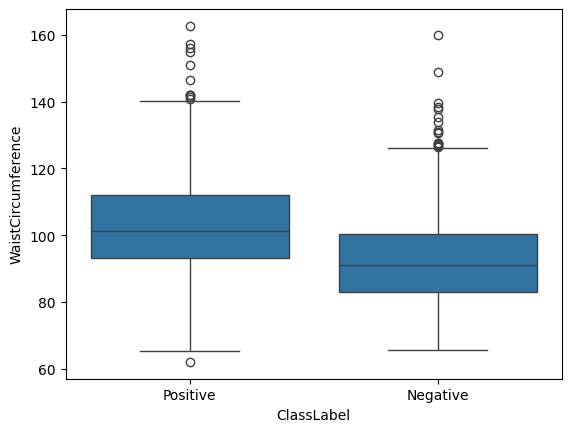

In [114]:
data=sns.boxplot(x="ClassLabel", y='WaistCircumference', data=df,order=['Positive', 'Negative'])
data.set_xticks([0, 1])
data.set_xticklabels(['Positive', 'Negative'])
plt.show()

Using the "quantile" method, print quartile information for BMI. Verify your results using the describe() method

In [115]:
print("Quantile value for 0.25:")
print(df['BMI'].quantile(0.25))
print("Quantile value for 0.50:")
print(df['BMI'].quantile(0.50))
print("Quantile value for 0.75:")
print(df['BMI'].quantile(0.75))

print(df.describe())


Quantile value for 0.25:
24.16
Quantile value for 0.50:
27.5
Quantile value for 0.75:
31.715
            Gender          Age         Race    Education  FamilyHistory  \
count  1503.000000  1503.000000  1503.000000  1503.000000    1503.000000   
mean      1.541583    49.231537     2.766467     3.433134       1.333333   
std       0.498434    17.646239     1.049072     1.271167       0.471561   
min       1.000000    20.000000     1.000000     1.000000       1.000000   
25%       1.000000    34.000000     2.000000     3.000000       1.000000   
50%       2.000000    48.000000     3.000000     4.000000       1.000000   
75%       2.000000    63.000000     3.000000     4.000000       2.000000   
max       2.000000    80.000000     5.000000     5.000000       2.000000   

       HighBloodSugar          BMI  WaistCircumference   SystolicBP  \
count     1503.000000  1503.000000         1503.000000  1503.000000   
mean         1.025948    28.416365           97.555888   120.359947   
std      

For the Education variable in the dataset, compute the bar-plots for different categories. The bar-plots should present the number of samples having each particular value.

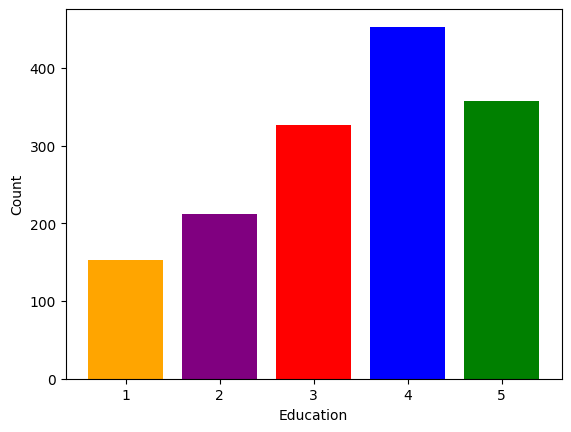

In [116]:
colors = ['blue', 'green', 'red', 'purple', 'orange']
ed = df['Education'].value_counts()
plt.bar(ed.index, ed.values, color=colors)
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

For BMI and WaistCircumference, compute a scatter plot. Comment on the relation between the two variables

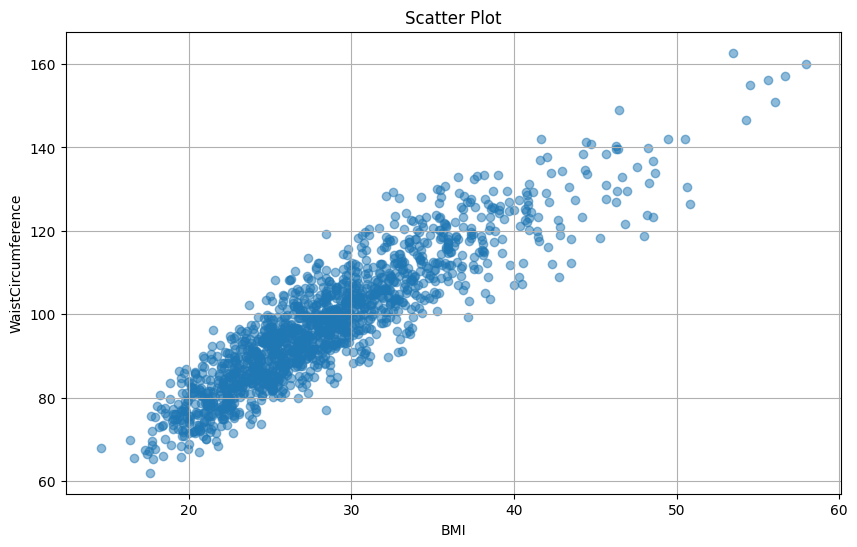

In [117]:
plt.figure(figsize=(10, 6))
plt.scatter(df['BMI'], df['WaistCircumference'], alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('WaistCircumference')
plt.title('Scatter Plot')
plt.grid(True)
plt.show()

For SystolicBP and Triglycerides, compute a scatter plot. Comment on the relation between the two variables

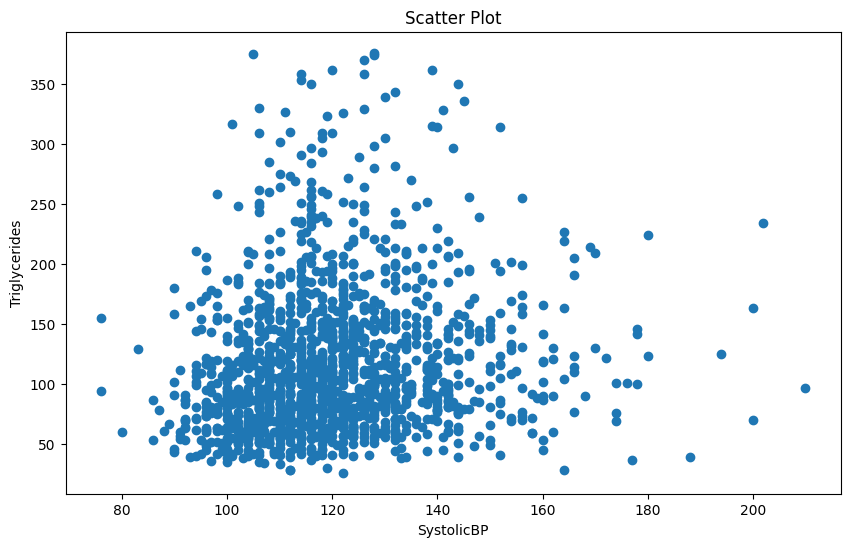

In [118]:
plt.figure(figsize=(10,6))
plt.scatter(df["SystolicBP"],df["Triglycerides"])
plt.xlabel("SystolicBP")
plt.ylabel("Triglycerides")
plt.title("Scatter Plot")
plt.show()